# Introduction
The Stack Overflow Developer Survey is an annual survey conducted by Stack Overflow, a popular online community for programmers and developers. The survey aims to gather insights into the developer community, including their backgrounds, preferences, and experiences. The dataset for this analysis is based on the Stack Overflow Developer Survey 2022.

# Prepare Data

In [137]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import requests
from bs4 import BeautifulSoup

%matplotlib inline

In [138]:
df = pd.read_csv("survey_results_public.csv")

In [139]:
# Display the first few rows of the DataFrame
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [140]:
# Describe the dataset
df.describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,73268.000000,3.842200e+04,0.0,0.0,36769.000000,3.807100e+04
mean,36634.500000,2.342434e+52,NaN,NaN,10.242378,1.707613e+05
std,21150.794099,4.591478e+54,NaN,NaN,8.706850,7.814132e+05
min,1.000000,0.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,18317.750000,3.000000e+04,NaN,NaN,4.000000,3.583200e+04
50%,36634.500000,7.750000e+04,NaN,NaN,8.000000,6.784500e+04
75%,54951.250000,1.540000e+05,NaN,NaN,15.000000,1.200000e+05
max,73268.000000,9.000000e+56,NaN,NaN,50.000000,5.000000e+07


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [142]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

ResponseId                 0
MainBranch                 0
Employment              1559
RemoteWork             14310
CodingActivities       14369
                       ...  
TrueFalse_2            37553
TrueFalse_3            37519
SurveyLength            2824
SurveyEase              2760
ConvertedCompYearly    35197
Length: 79, dtype: int64


In [143]:
# Fill missing values with the mean of the column
df = df.fillna(df.mean())

# Print the dataframe with filled missing values
df.info()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14324\8461030.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

Filling missing values with mean values method has several advantages:

- Simplicity: Calculating the mean is a straightforward and simple process. It involves summing up all the values in a dataset and dividing by the number of values. This makes it easy to understand and implement.

- Reflects the average: The mean is often used as a measure of central tendency because it represents the average value of the data. It provides a summary statistic that gives an idea of the typical value in the dataset.

- Utilizes all the data: The mean takes into account all the values in the dataset, giving equal weight to each value. This means that no data point is ignored or overlooked in the calculation, and each value contributes to the overall mean.

- Works well with normal distribution: If the data follows a normal distribution or is close to normally distributed, the mean provides an accurate representation of the central tendency. It aligns with the peak of the distribution and captures the balance between the left and right tails.

# Business Understanding
In today's rapidly evolving technology landscape, understanding the preferences and trends among developers is crucial for businesses, organizations, and aspiring developers. By analyzing the survey data, we can gain valuable insights into the programming languages, technologies, and practices that are most popular among developers. This information can help businesses make informed decisions about technology adoption, recruitment strategies, and resource allocation. It can also provide aspiring developers with guidance on the skills and tools that are in high demand in the industry.

Questions to Explore:
Through this analysis, we will explore the following questions:
1. Demographics: Who are the developers?
2. The Global Developer Map: Where are they located?
3. Programming Languages: What do developers code in?
4. Education: How do developers learn and grow?
5. Income Distribution: Exploring the financial aspect
By addressing these questions, we aim to provide valuable insights into the developer community and shed light on the current trends and dynamics within the industry. Let's dive into the analysis and explore the fascinating world of developers!


### Visualize the number of developers in each main branch:

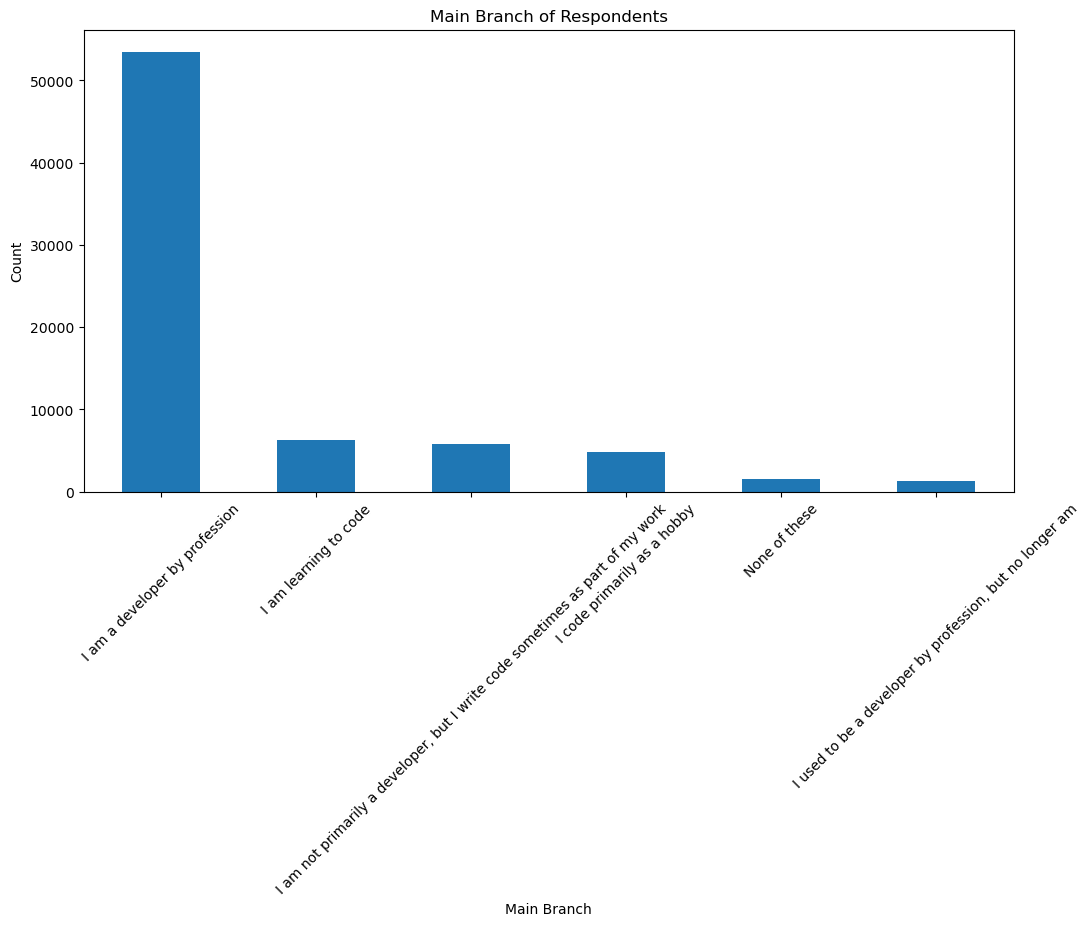

In [144]:
# Count the number of occurrences for each main branch
main_branch_counts = df['MainBranch'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
main_branch_counts.plot(kind='bar')
plt.title('Main Branch of Respondents')
plt.xlabel('Main Branch')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [164]:
# define a plot pie chart function
def plot_pie_chart(data, title, figsize=(8, 8)):
    """
    Plot a pie chart with percentage values, a title
    
    Parameters:
    - data (pd.Series): The data to plot.
    - title (str): The title of the pie chart.
    - figsize (tuple): The size of the figure (default: (8, 8)).
    """
    plt.figure(figsize=figsize)
    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title(title)
     
    plt.show()

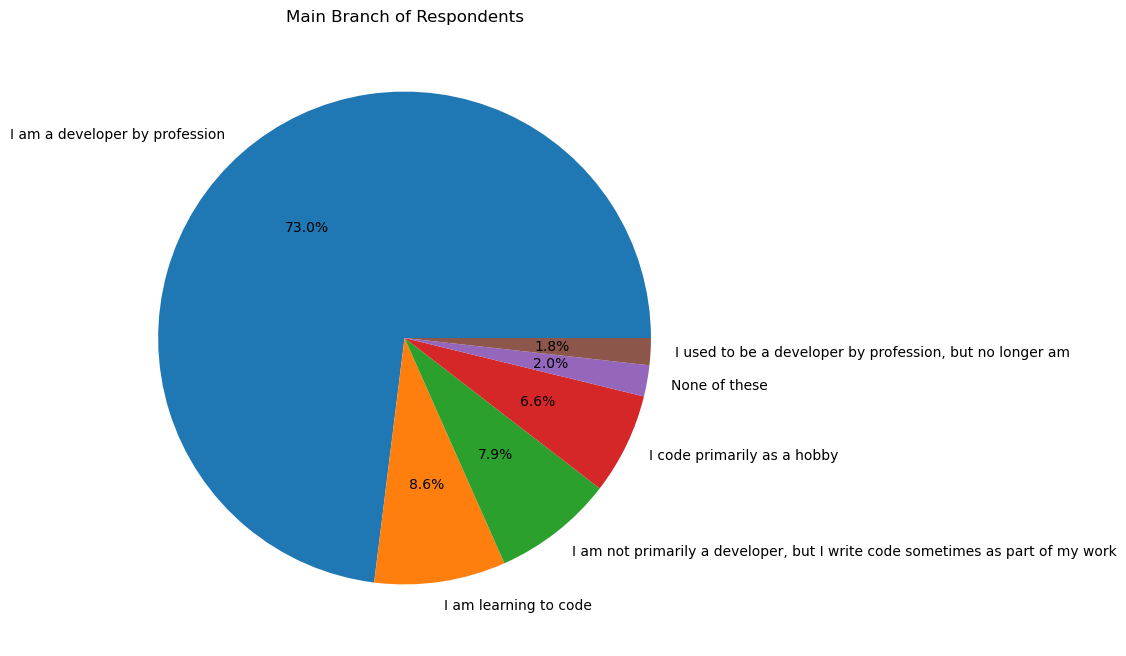

In [146]:
main_branch_counts = df['MainBranch'].value_counts()
plot_pie_chart(main_branch_counts, 'Main Branch of Respondents')

We can see that the majority (73%) of respondents are professional developer.

### Visualize employment status

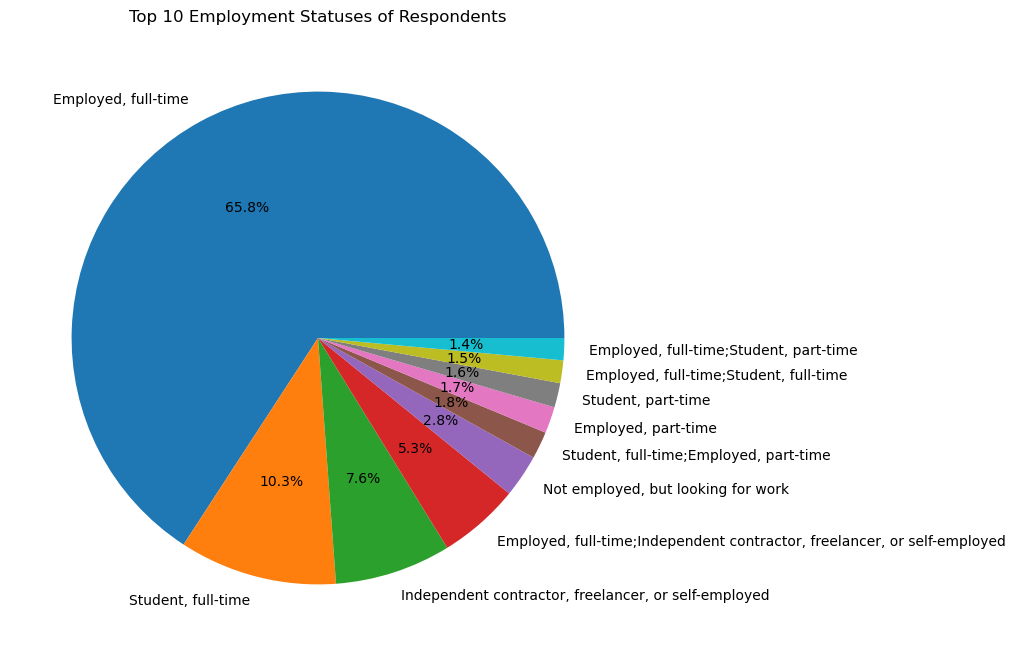

In [147]:
employment_counts = df['Employment'].value_counts()
plot_pie_chart(employment_counts.head(10), 'Top 10 Employment Statuses of Respondents')

We can see that most developers work under a full-time contract. The number of those who study full time is also significant.

### Visualize the status of remote work

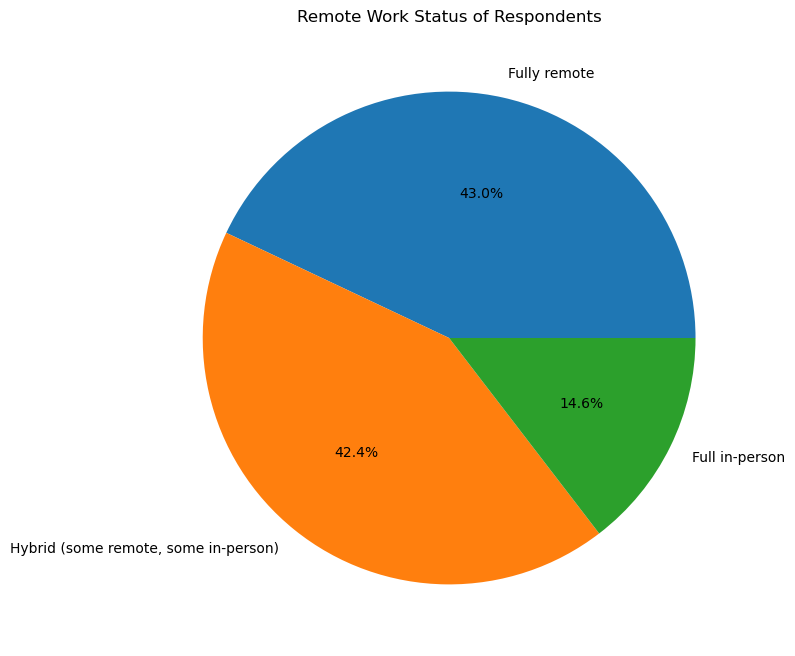

In [148]:
remote_work_counts = df['RemoteWork'].value_counts()
plot_pie_chart(remote_work_counts, 'Remote Work Status of Respondents')

We can see that the number of developers who work full remote and hybrid is almost the same. Only a small number of developers work fully in person.

### Where did developers learn to code?

In [149]:
def plot_pie_chart_with_legend(data, title, figsize=(30, 30), title_fontsize=100, legend_fontsize=50):
    """
    Plot a pie chart with percentage values, a dynamic title, and a legend box 
    
    Parameters:
    - data (pd.Series): The data to plot.
    - title (str): The title of the pie chart.
    - figsize (tuple): The size of the figure.
    - title_fontsize (int): The font size for the title.
    - legend_fontsize (int): The font size for the legend box.
    """
    plt.figure(figsize=figsize)
    patches, _, _ = plt.pie(data, labels=None, autopct='%1.1f%%', textprops={'fontsize': legend_fontsize})
    plt.title(title, fontsize=title_fontsize)
    
    # Add legend box with larger text size
    plt.legend(data.index, loc='center left', bbox_to_anchor=(1, 0.5), title='', prop={'size': legend_fontsize})
    
    # Set text size for the legend box
    for text in plt.gca().get_legend().get_texts():
        text.set_fontsize(legend_fontsize)
    
    plt.show()

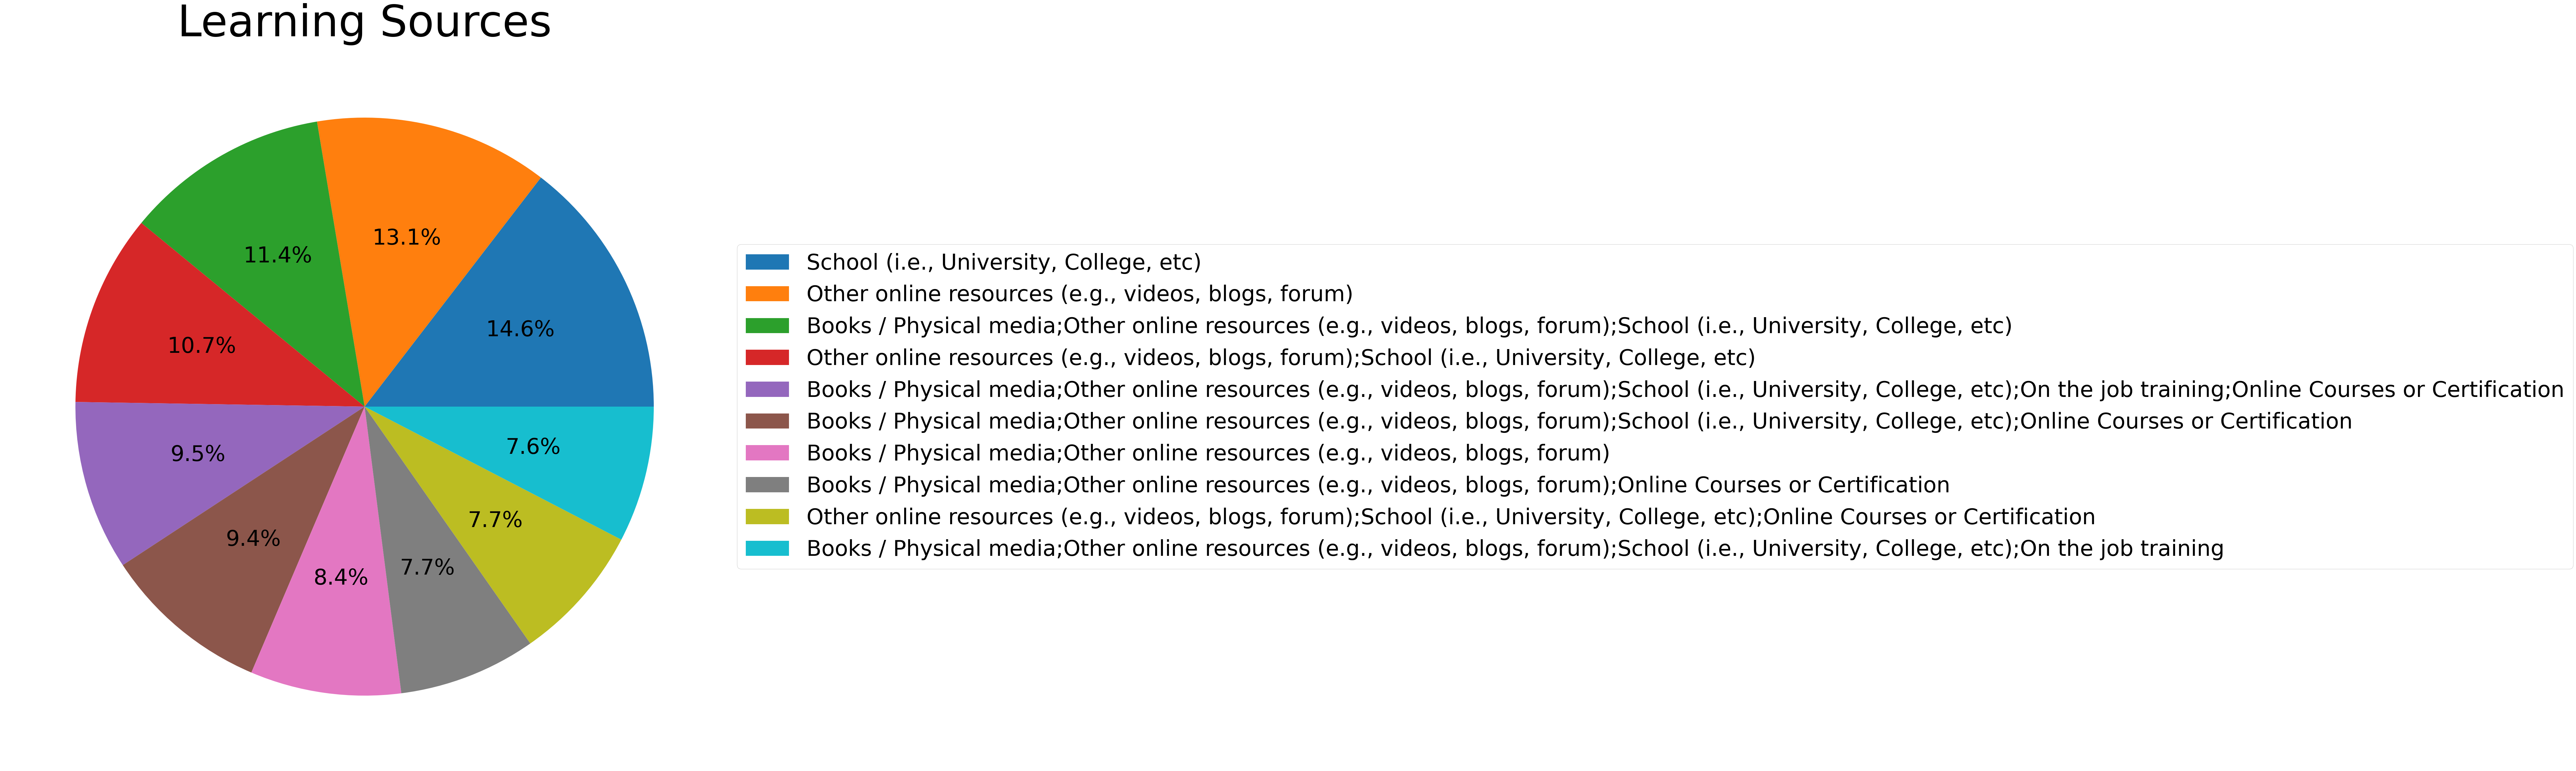

In [150]:
title = 'Learning Sources'
plot_pie_chart_with_legend(learn_source_counts, title)

We can see that developers learn to code from various sources. The top 3 common sources are school, online resources and books.

### Education level of developers

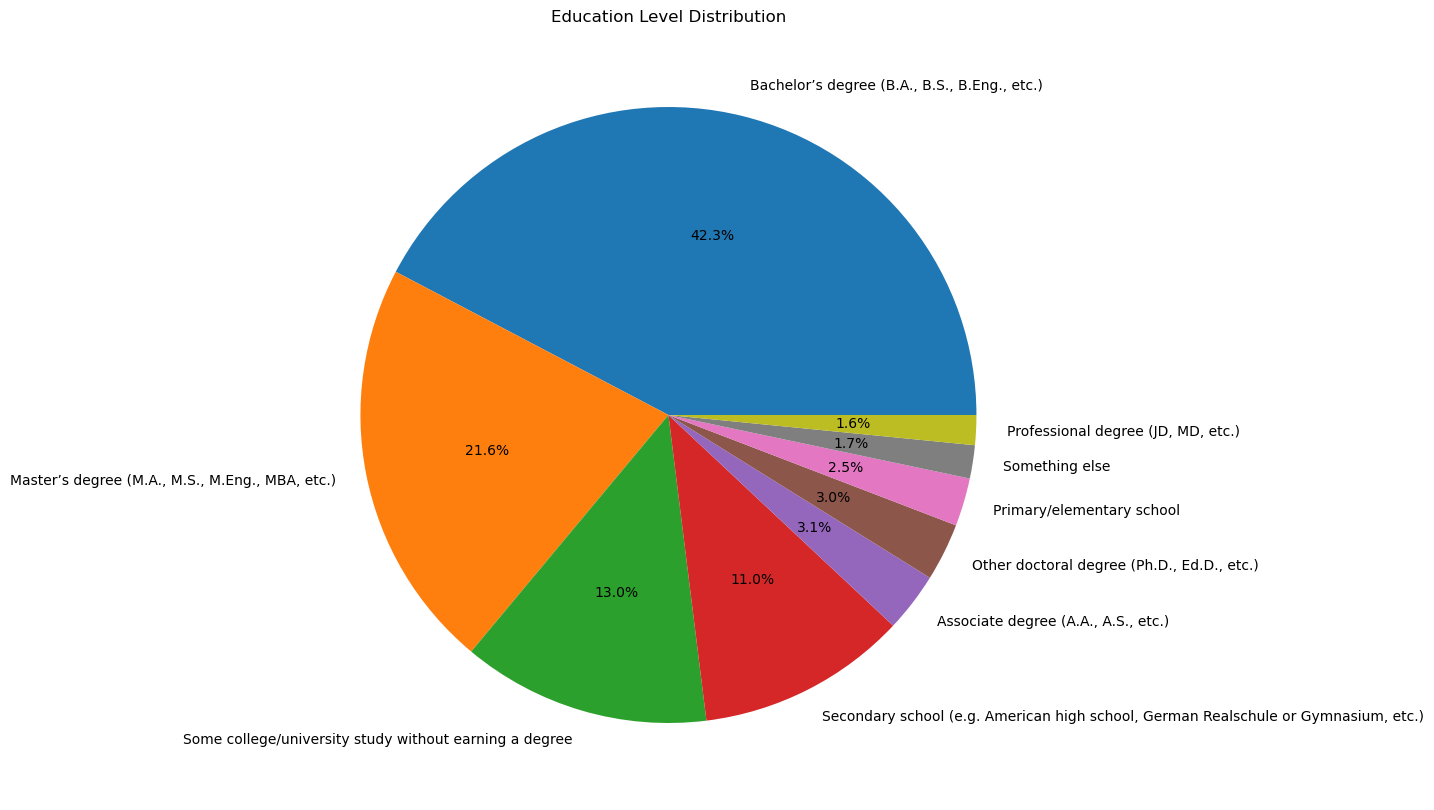

In [151]:
# Count the occurrences of each education level
education_counts = df['EdLevel'].value_counts()

# Plot the pie chart using the reusable function
plot_pie_chart(education_counts, 'Education Level Distribution', figsize=(10, 10))

We can see that the majority of developers hold a bachelor's degree or master's degree.

### Top countries with Most Developers

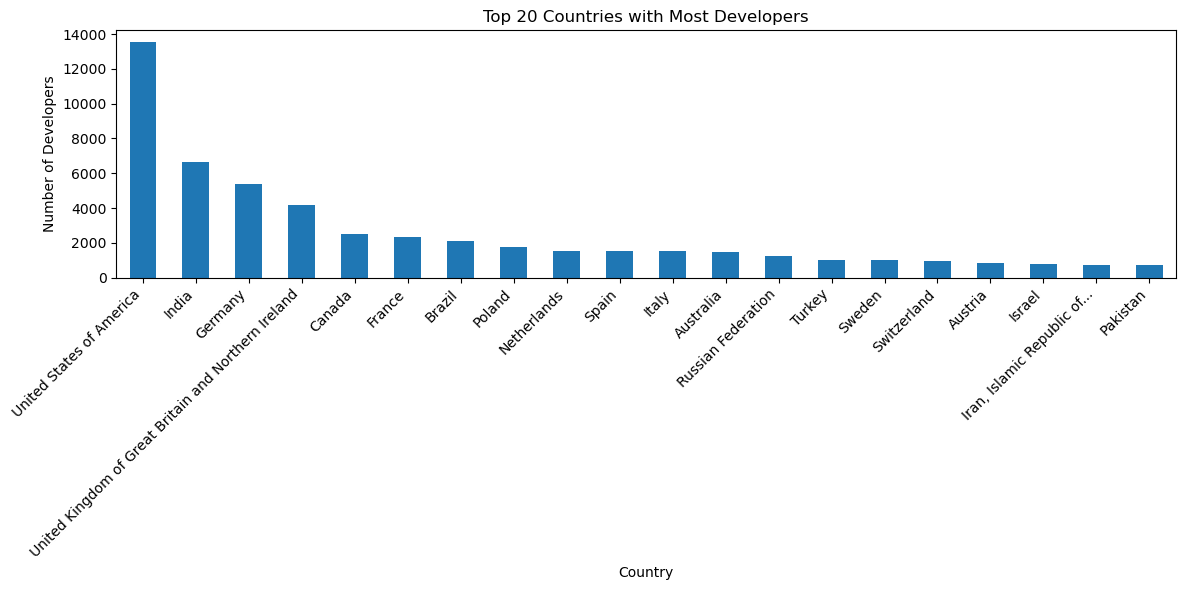

In [152]:
# Count the number of occurrences for each country
country_counts = df['Country'].value_counts().head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Top 20 Countries with Most Developers')
plt.xlabel('Country')
plt.ylabel('Number of Developers')

# Adjust the position of x-axis ticks
plt.xticks(range(len(country_counts)), country_counts.index, rotation=45, ha='right')

plt.tight_layout()

plt.show()

It is obvious that USA has most developers, almost double the number of developers working in India.

### Top currenices being used by developers

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14324\46903504.py:17: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


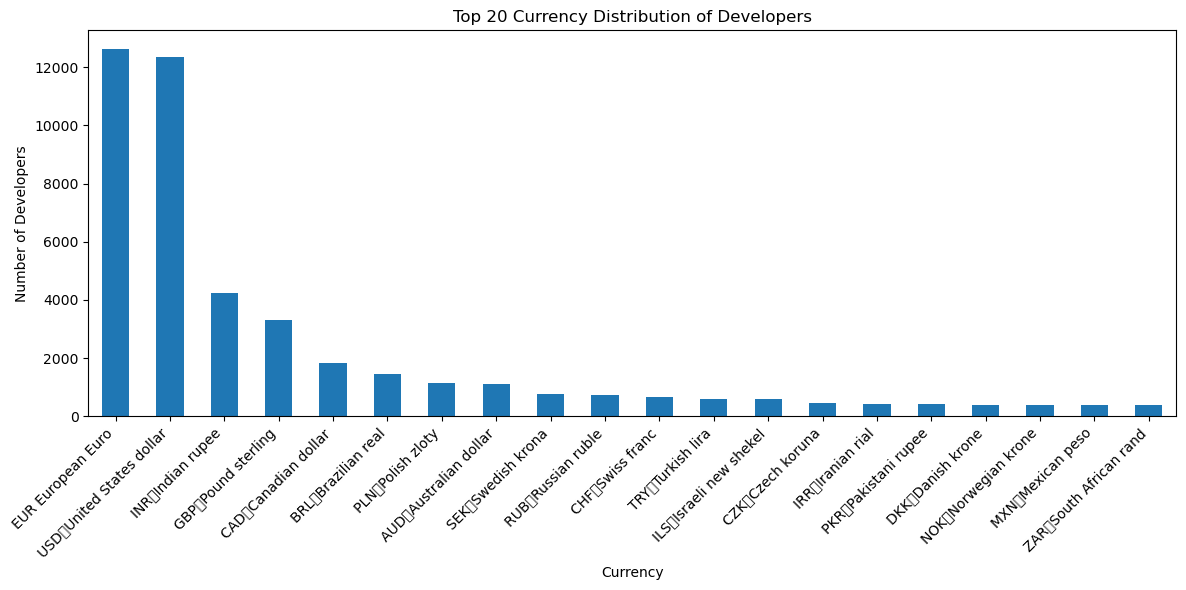

In [153]:
# Filter out rows where Currency is not null
currency_data = df[df['Currency'].notnull()]

# Count the frequency of each currency
currency_counts = currency_data['Currency'].value_counts().head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
currency_counts.plot(kind='bar')
plt.title('Top 20 Currency Distribution of Developers')
plt.xlabel('Currency')
plt.ylabel('Number of Developers')

# Adjust the position of x-axis ticks
plt.xticks(range(len(currency_counts)), currency_counts.index, rotation=45, ha='right')

plt.tight_layout()

plt.show()

### Average income of developers

In [154]:
# Make a request to the ExchangeRate-API to get the latest exchange rates
response = requests.get('https://api.exchangerate-api.com/v4/latest/USD')

# Parse the JSON response
data = response.json()

# Get the exchange rates
exchange_rates = data['rates']

# Print the exchange rates
for currency, rate in exchange_rates.items():
    print(currency, rate)

USD 1
AED 3.67
AFN 85.95
ALL 90.19
AMD 386.32
ANG 1.79
AOA 833.39
ARS 266.67
AUD 1.47
AWG 1.79
AZN 1.7
BAM 1.74
BBD 2
BDT 108.75
BGN 1.74
BHD 0.376
BIF 2820.23
BMD 1
BND 1.32
BOB 6.91
BRL 4.81
BSD 1
BTN 82.07
BWP 13.16
BYN 2.76
BZD 2
CAD 1.32
CDF 2335.2
CHF 0.858
CLP 818.22
CNY 7.18
COP 4020.42
CRC 538.05
CUP 24
CVE 98.17
CZK 21.2
DJF 177.72
DKK 6.64
DOP 55.97
DZD 134.39
EGP 30.9
ERN 15
ETB 55.01
EUR 0.89
FJD 2.19
FKP 0.766
FOK 6.64
GBP 0.766
GEL 2.57
GGP 0.766
GHS 11.52
GIP 0.766
GMD 62.87
GNF 8501.49
GTQ 7.84
GYD 210.15
HKD 7.81
HNL 24.59
HRK 6.71
HTG 138.03
HUF 332.55
IDR 14991.74
ILS 3.61
IMP 0.766
INR 82.07
IQD 1307.74
IRR 41992.62
ISK 130.25
JEP 0.766
JMD 154.49
JOD 0.709
JPY 138.82
KES 141.73
KGS 87.86
KHR 4135.06
KID 1.47
KMF 438
KRW 1262.69
KWD 0.306
KYD 0.833
KZT 443.8
LAK 19093.65
LBP 15000
LKR 322.06
LRD 183.92
LSL 17.87
LYD 4.74
MAD 9.73
MDL 18.02
MGA 4472.25
MKD 54.78
MMK 2096.4
MNT 3438.4
MOP 8.05
MRU 35.95
MUR 45.18
MVR 15.44
MWK 1052.38
MXN 16.75
MYR 4.54
MZN 64.31
NAD

In [155]:
# Convert the currency values to USD
df['ConvertedCompUSD'] = df['ConvertedCompYearly'] / df['Currency'].str[:3].map(exchange_rates)

# Print the updated DataFrame with USD values
df.head(10)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly,ConvertedCompUSD
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170761.277849,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,170761.277849,129364.604431
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.000000,52486.945170
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.000000,59621.052632
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,170761.277849,170761.277849
5,6,"I am not primarily a developer, but I write co...","Student, full-time",NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,170761.277849,NaN
6,7,I code primarily as a hobby,"Student, part-time",NaN,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Stack Overflow;Video-based Online Courses,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,170761.277849,NaN
7,8,I am a developer by profession,"Not employed, but looking for work",NaN,NaN,Some college/university study without earning ...,Online Courses or Certification,NaN,Coursera;Udemy,1,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,170761.277849,NaN
8,9,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Coding Bootcamp,NaN,NaN,6,...,Over 120 minutes a day,Somewhat long,Innersource initiative;DevOps function;Microse...,Yes,Yes,Yes,Appropriate in length,Easy,49056.000000,55119.101124
9,10,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Fully remote,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,37,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,170761.277849,25448.774642


In [156]:
# Remove rows with missing values in ConvertedCompUSD column
df_clean = df.dropna(subset=['ConvertedCompUSD'])

# Calculate the minimum salary
min_salary = df_clean['ConvertedCompUSD'].min()

# Calculate the maximum salary
max_salary = df_clean['ConvertedCompUSD'].max()

# Calculate the average salary
avg_salary = df_clean['ConvertedCompUSD'].mean()

# Print the results
print("Minimum Salary:", min_salary)
print("Maximum Salary:", max_salary)
print("Average Salary:", avg_salary)

Minimum Salary: 4.229604950668003e-05
Maximum Salary: 50326287.640449435
Average Salary: 142063.345109335


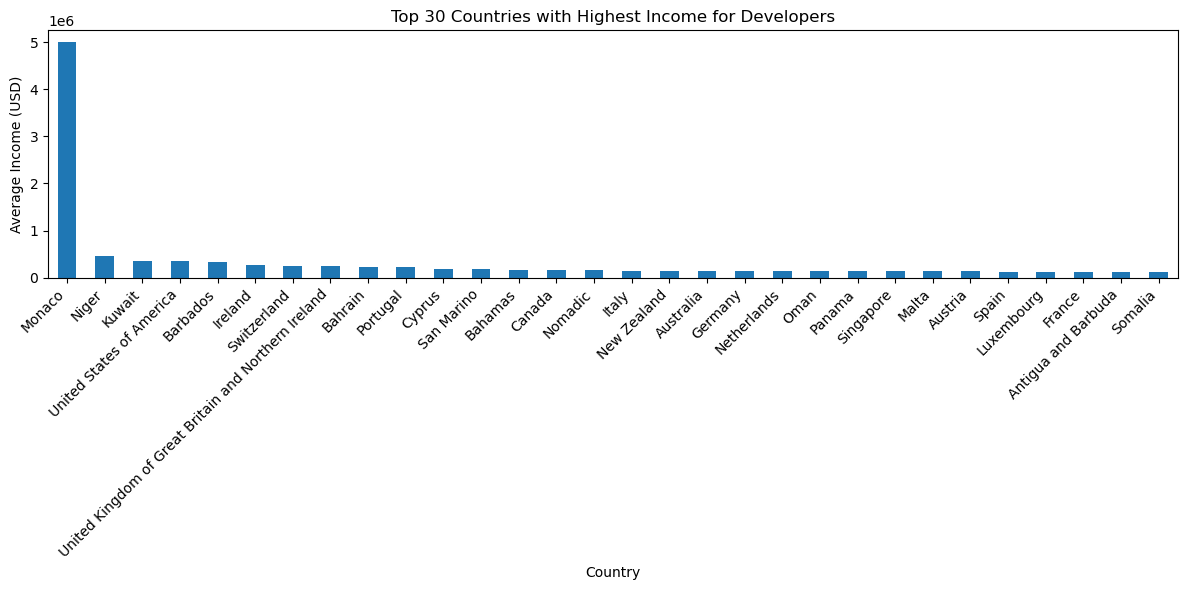

In [157]:
# Group the data by country and calculate the average income
country_income = df.groupby('Country')['ConvertedCompUSD'].mean()

# Sort the values in descending order and select the top 30 countries
top_30_countries = country_income.sort_values(ascending=False).head(30)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_30_countries.plot(kind='bar')
plt.title('Top 30 Countries with Highest Income for Developers')
plt.xlabel('Country')
plt.ylabel('Average Income (USD)')
plt.xticks(rotation=45, ha='right')  # Specify ha='right' for right alignment
plt.tight_layout()
plt.show()

### Most popular programming language

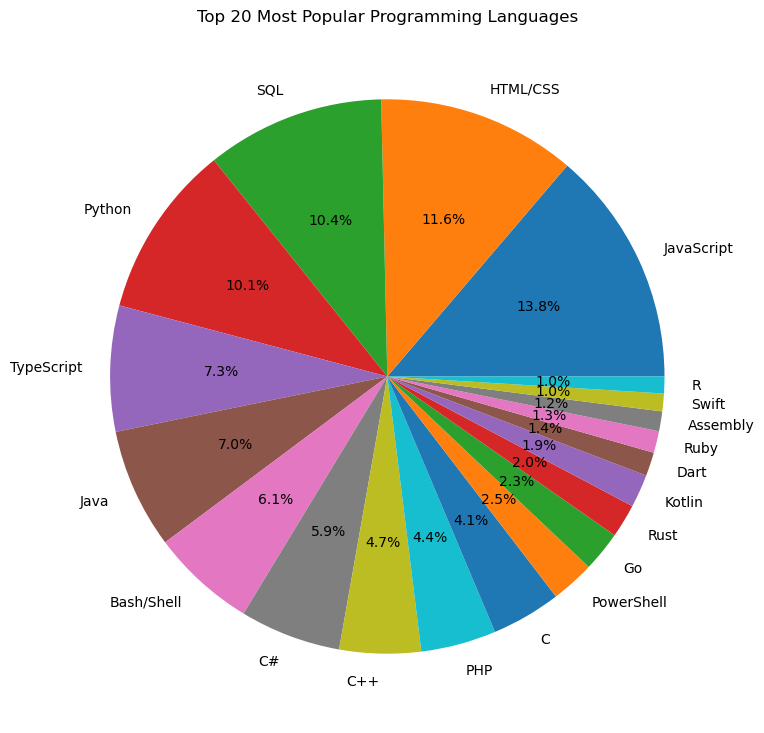

In [158]:
# Count the occurrences of each programming language
language_counts = df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts()

# Get the top 10 most popular programming languages
top_languages = language_counts.head(20)

# Plot the pie chart using the reusable function
plot_pie_chart(top_languages, 'Top 20 Most Popular Programming Languages', figsize=(9, 9))

Top 4 programming languages are JavaScript, HTML/CSS, SQL, Python

### Age distribution of developers

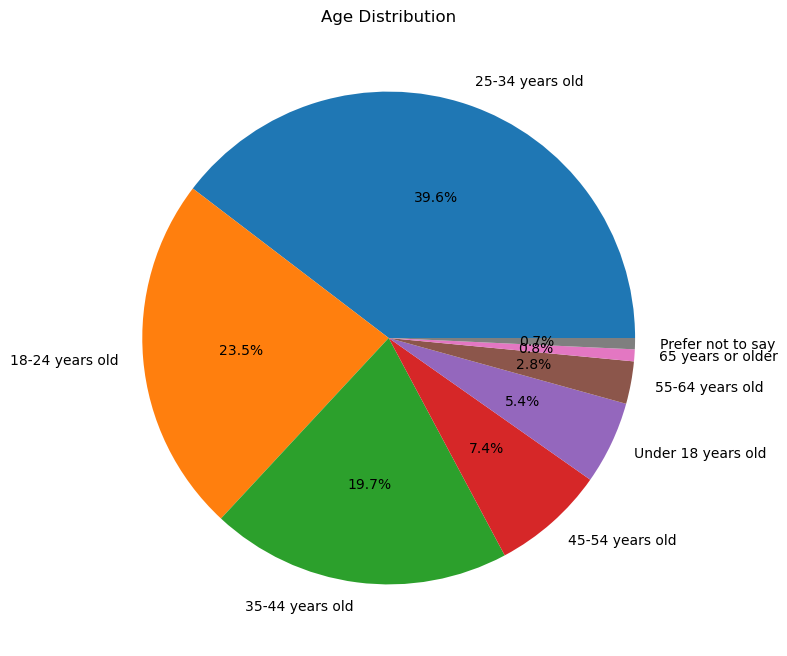

In [159]:
# Count the occurrences of each age group
age_counts = df['Age'].value_counts()

# Plot the pie chart using the reusable function
plot_pie_chart(age_counts, 'Age Distribution', figsize=(8, 8))

We can see that 25-34 is the most popular age group, followed by 18-24 and 35-44 groups. The majority of developers are in their young age.

### Gender distribution among developers

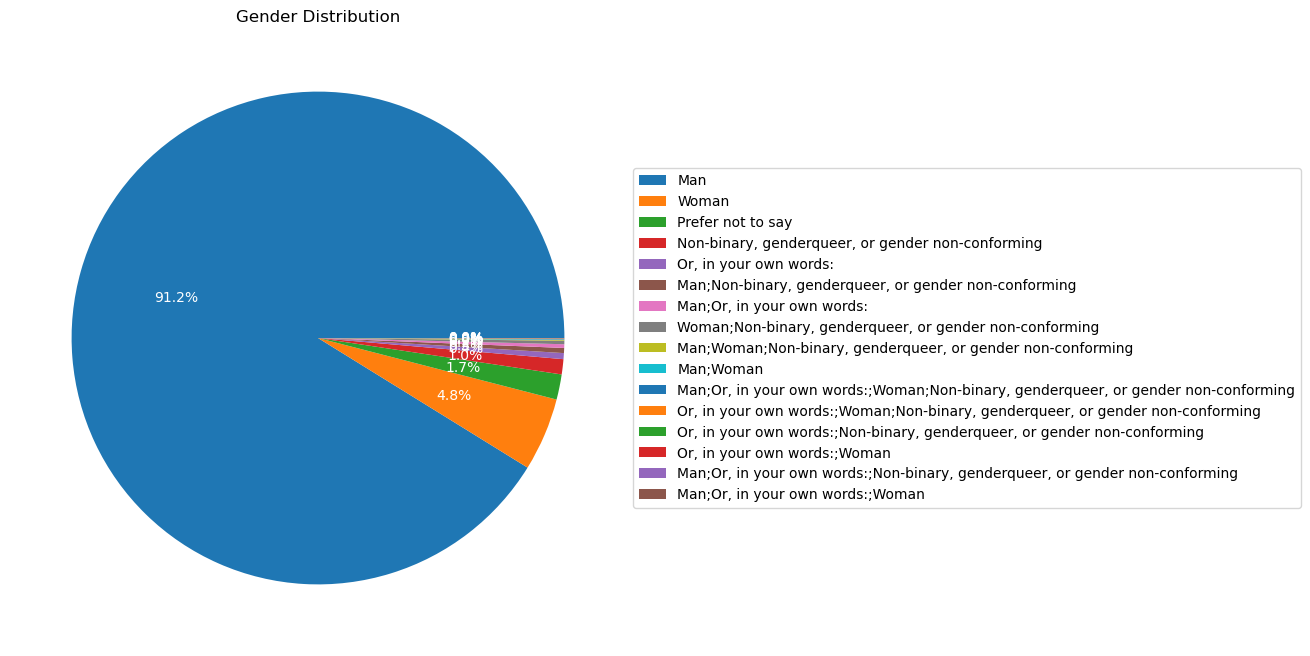

In [160]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
wedges, labels, _ = plt.pie(gender_counts, autopct='%1.1f%%', textprops={'color': 'w'})

# Add legends
plt.legend(wedges, gender_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Gender Distribution')
plt.show()

It is obvious that men dominated the industry, only 5% of developers are women.

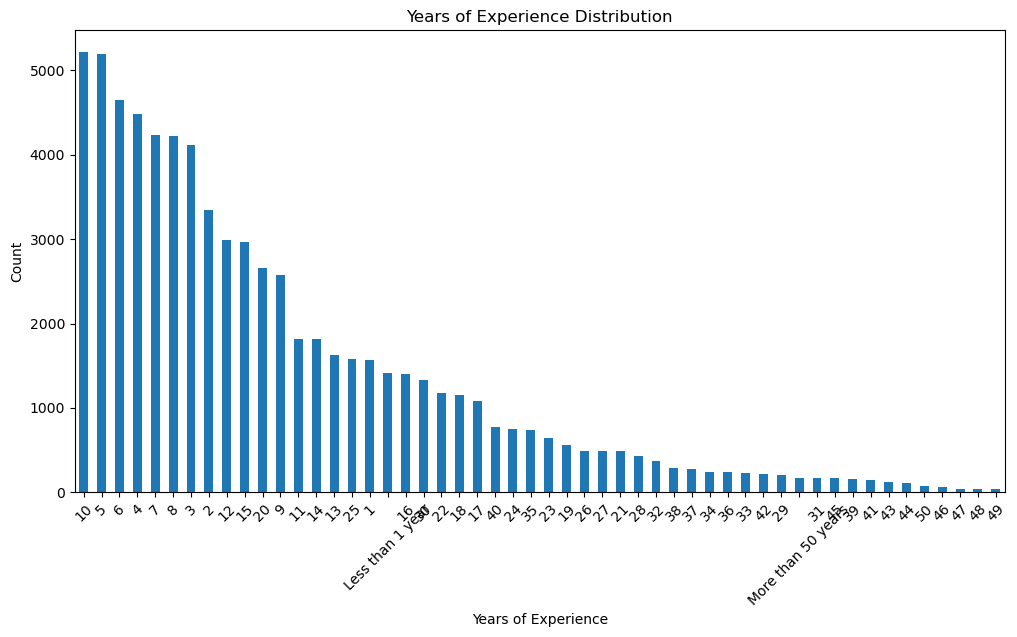

In [161]:
# Count the occurrences of each year of experience
experience_counts = df['YearsCode'].value_counts()

# Sort the counts in descending order of frequency
experience_counts_sorted = experience_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
experience_counts_sorted.plot(kind='bar')

plt.title('Years of Experience Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

### Is there a difference in income of male and female developers?

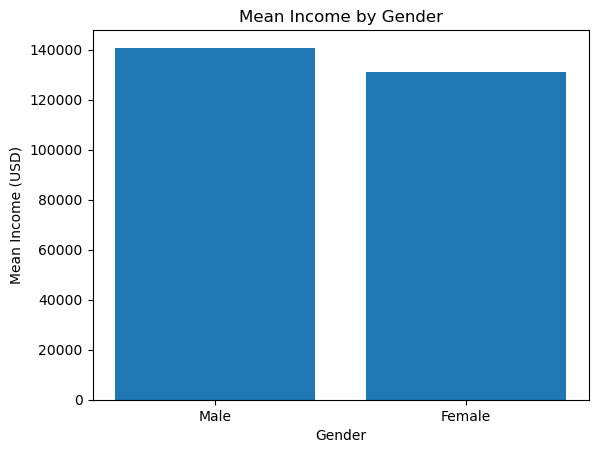

In [162]:
# Calculate the mean income for males and females
male_mean_income = df[df['Gender'] == 'Man']['ConvertedCompUSD'].mean()
female_mean_income = df[df['Gender'] == 'Woman']['ConvertedCompUSD'].mean()

# Create a bar chart
plt.bar(['Male', 'Female'], [male_mean_income, female_mean_income])
plt.title('Mean Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Income (USD)')

# Display the plot
plt.show()

In [163]:
male_mean_income = df[df['Gender'] == 'Man']['ConvertedCompUSD'].mean()
female_mean_income = df[df['Gender'] == 'Woman']['ConvertedCompUSD'].mean()

print("Mean Income - Male: $", male_mean_income)
print("Mean Income - Female: $", female_mean_income)

Mean Income - Male: $ 140773.65073347552
Mean Income - Female: $ 131194.3536712802


We can see that male developers tend to earn higher income. However, the gap between two genders is not significant.